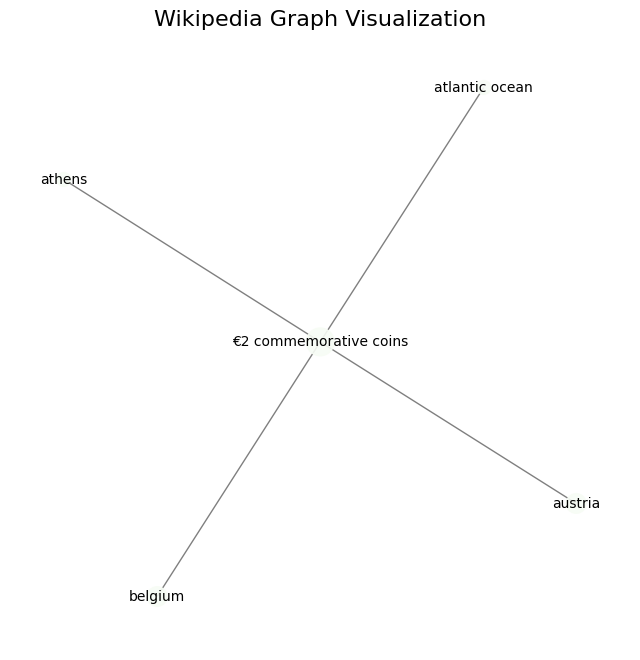

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Data for the left graph
edges_left = [
    ("€2 commemorative coins", "austria"),
    ("€2 commemorative coins", "belgium"),
    ("€2 commemorative coins", "athens"),
    ("€2 commemorative coins", "atlantic ocean"),
]
modularity_communities_left = {
    "€2 commemorative coins": 0,
    "austria": 0,
    "belgium": 0,
    "athens": 0,
    "atlantic ocean": 0,
}
pagerank_left = {
    "€2 commemorative coins": 0.4,
    "austria": 0.2,
    "belgium": 0.2,
    "athens": 0.1,
    "atlantic ocean": 0.1,
}

# Create the graph
G_left = nx.Graph()
G_left.add_edges_from(edges_left)

# Assign node colors and sizes
colors_left = [modularity_communities_left[node] for node in G_left.nodes()]
sizes_left = [pagerank_left[node] * 1000 for node in G_left.nodes()]

# Draw the graph
plt.figure(figsize=(8, 8))
pos_left = nx.spring_layout(G_left, seed=42)
nx.draw_networkx_nodes(G_left, pos_left, node_size=sizes_left, node_color=colors_left, cmap=plt.cm.Greens, alpha=0.9)
nx.draw_networkx_edges(G_left, pos_left, alpha=0.5)
nx.draw_networkx_labels(G_left, pos_left, font_size=10)

plt.title("Wikipedia Graph Visualization", fontsize=16)
plt.axis("off")
plt.show()


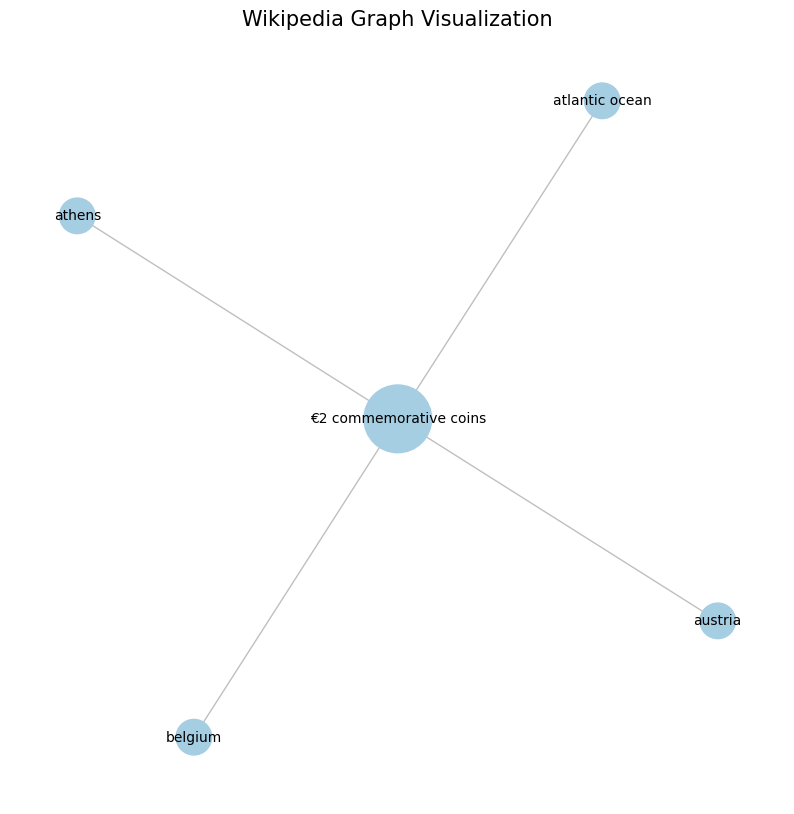

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

# Create the graph
G = nx.Graph()
edges = [("€2 commemorative coins", "austria"),
         ("€2 commemorative coins", "belgium"),
         ("€2 commemorative coins", "athens"),
         ("€2 commemorative coins", "atlantic ocean")]
G.add_edges_from(edges)

# Calculate PageRank for node sizes
pagerank = nx.pagerank(G)
node_sizes = [pagerank[node] * 5000 for node in G.nodes()]

# Detect communities using greedy modularity
communities = list(greedy_modularity_communities(G))
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# Assign colors to nodes based on communities
colors = [community_map[node] for node in G.nodes()]

# Plot the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # Fix layout for consistency
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color="gray")
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=node_sizes, cmap=plt.cm.Paired)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
plt.title("Wikipedia Graph Visualization", fontsize=15)
plt.axis("off")
plt.show()


/var/folders/9m/hdnmjb2s317bp4hpkl0_4qmh0000gn/T/ipykernel_26724/3097525057.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('Set2', num_communities)  # Use a fancy colormap
/var/folders/9m/hdnmjb2s317bp4hpkl0_4qmh0000gn/T/ipykernel_26724/3097525057.py:35: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

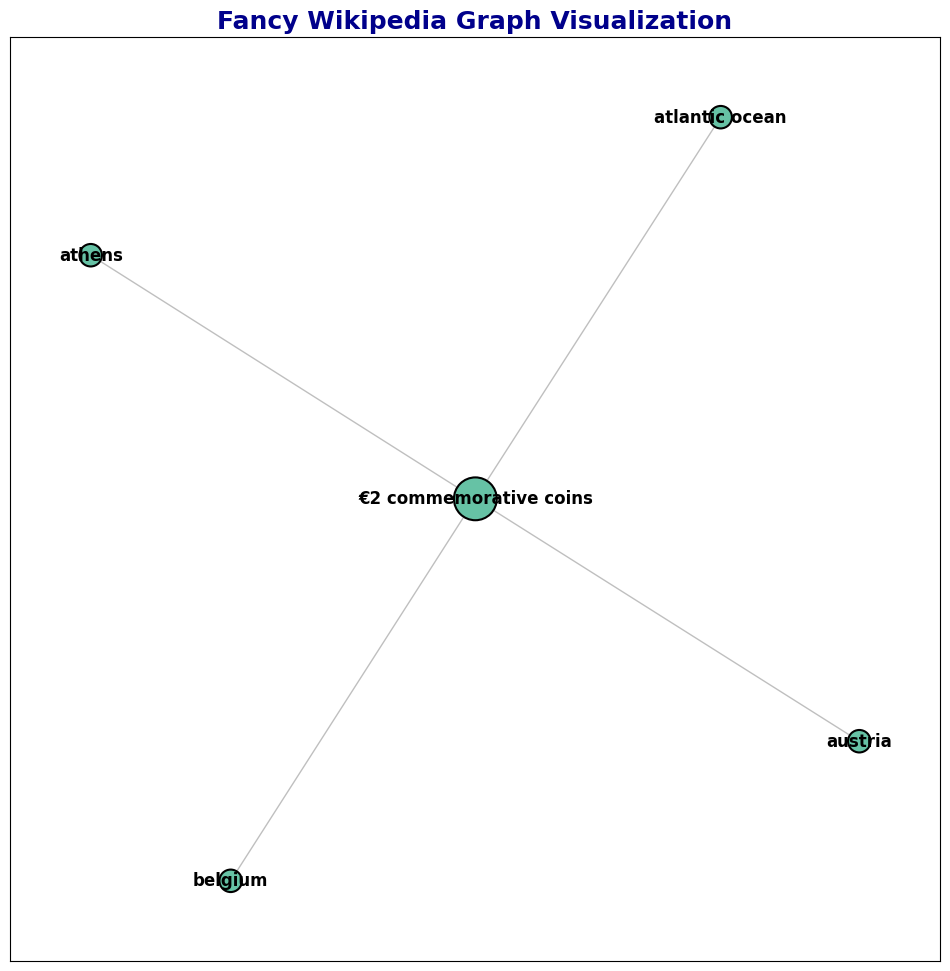

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.cm as cm

# Create the graph
G = nx.Graph()
edges = [("€2 commemorative coins", "austria"),
         ("€2 commemorative coins", "belgium"),
         ("€2 commemorative coins", "athens"),
         ("€2 commemorative coins", "atlantic ocean")]
G.add_edges_from(edges)

# Calculate PageRank for node sizes
pagerank = nx.pagerank(G)
node_sizes = [pagerank[node] * 2000 for node in G.nodes()]  # Scaled for larger nodes

# Detect communities using greedy modularity
communities = list(greedy_modularity_communities(G))
community_map = {}
for i, community in enumerate(communities):
    for node in community:
        community_map[node] = i

# Assign colors to nodes based on communities
num_communities = len(communities)
colors = [community_map[node] for node in G.nodes()]
color_map = cm.get_cmap('Set2', num_communities)  # Use a fancy colormap

# Plot the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Fix layout for consistency

# Draw edges with transparency and slight curves
nx.draw_networkx_edges(
    G, pos, alpha=0.5, edge_color="gray", connectionstyle="arc3,rad=0.1"
)

# Draw nodes with gradient colors and scaled sizes
nx.draw_networkx_nodes(
    G,
    pos,
    node_color=colors,
    cmap=color_map,
    node_size=node_sizes,
    edgecolors="black",  # Add borders to nodes
    linewidths=1.5,
)

# Draw labels with a modern font style
nx.draw_networkx_labels(
    G, pos, font_size=12, font_color="black", font_family="sans-serif", font_weight="bold"
)

# Add a title and legend
plt.title("Fancy Wikipedia Graph Visualization", fontsize=18, fontweight="bold", color="darkblue")
sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=0, vmax=num_communities - 1))
sm.set_array([])
cbar = plt.colorbar(sm, boundaries=range(num_communities), ticks=range(num_communities))
cbar.set_label("Communities", rotation=270, labelpad=15)

# Remove axis for a clean look
plt.axis("off")
plt.tight_layout()
plt.show()


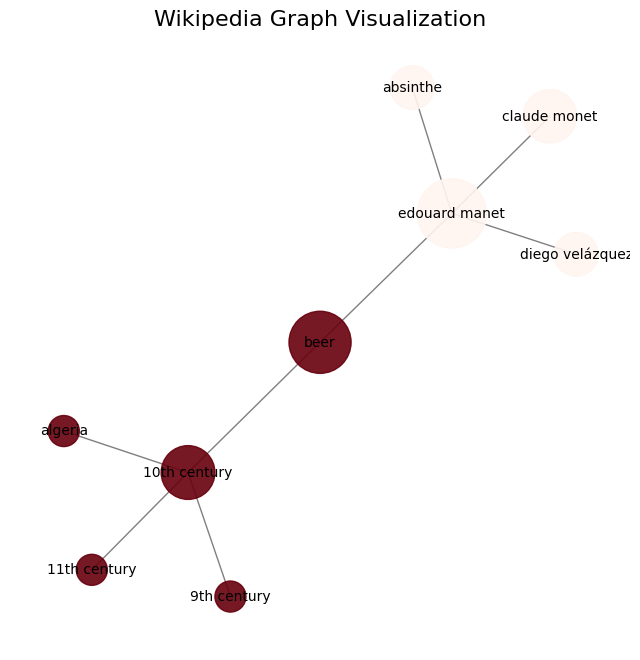

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Data for the right graph
edges_right = [
    ("edouard manet", "claude monet"),
    ("edouard manet", "diego velázquez"),
    ("edouard manet", "absinthe"),
    ("beer", "edouard manet"),
    ("beer", "10th century"),
    ("10th century", "9th century"),
    ("10th century", "11th century"),
    ("10th century", "algeria"),
]
modularity_communities_right = {
    "edouard manet": 2,
    "claude monet": 2,
    "diego velázquez": 2,
    "absinthe": 2,
    "beer": 5,
    "10th century": 5,
    "9th century": 5,
    "11th century": 5,
    "algeria": 5,
}
pagerank_right = {
    "edouard manet": 0.5,
    "claude monet": 0.3,
    "diego velázquez": 0.2,
    "absinthe": 0.2,
    "beer": 0.4,
    "10th century": 0.3,
    "9th century": 0.1,
    "11th century": 0.1,
    "algeria": 0.1,
}

# Create the graph
G_right = nx.Graph()
G_right.add_edges_from(edges_right)

# Assign node colors and sizes
colors_right = [modularity_communities_right[node] for node in G_right.nodes()]
sizes_right = [pagerank_right[node] * 5000 for node in G_right.nodes()]

# Draw the graph
plt.figure(figsize=(8, 8))
pos_right = nx.spring_layout(G_right, seed=42)
nx.draw_networkx_nodes(G_right, pos_right, node_size=sizes_right, node_color=colors_right, cmap=plt.cm.Reds, alpha=0.9)
nx.draw_networkx_edges(G_right, pos_right, alpha=0.5)
nx.draw_networkx_labels(G_right, pos_right, font_size=10)

plt.title("Wikipedia Graph Visualization", fontsize=16)
plt.axis("off")
plt.show()


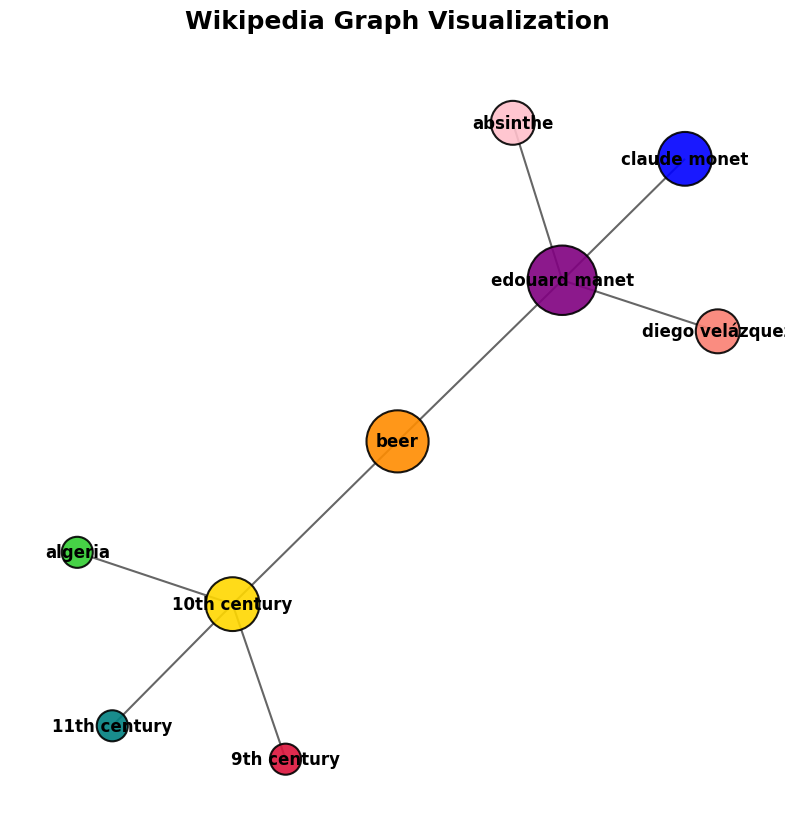

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Data for the right graph
edges_right = [
    ("edouard manet", "claude monet"),
    ("edouard manet", "diego velázquez"),
    ("edouard manet", "absinthe"),
    ("beer", "edouard manet"),
    ("beer", "10th century"),
    ("10th century", "9th century"),
    ("10th century", "11th century"),
    ("10th century", "algeria"),
]
modularity_communities_right = {
    "edouard manet": 2,
    "claude monet": 2,
    "diego velázquez": 2,
    "absinthe": 2,
    "beer": 5,
    "10th century": 5,
    "9th century": 5,
    "11th century": 5,
    "algeria": 5,
}
pagerank_right = {
    "edouard manet": 0.5,
    "claude monet": 0.3,
    "diego velázquez": 0.2,
    "absinthe": 0.2,
    "beer": 0.4,
    "10th century": 0.3,
    "9th century": 0.1,
    "11th century": 0.1,
    "algeria": 0.1,
}

# Create the graph
G_right = nx.Graph()
G_right.add_edges_from(edges_right)

# Define a custom color mapping for nodes
custom_colors = {
    "edouard manet": "purple",
    "claude monet": "blue",
    "diego velázquez": "salmon",
    "absinthe": "pink",
    "beer": "darkorange",
    "10th century": "gold",
    "9th century": "crimson",
    "11th century": "teal",
    "algeria": "limegreen",
}
node_colors = [custom_colors[node] for node in G_right.nodes()]

# Assign sizes based on pagerank
sizes_right = [pagerank_right[node] * 5000 for node in G_right.nodes()]

# Draw the graph with customized aesthetics
plt.figure(figsize=(10, 10))
pos_right = nx.spring_layout(G_right, seed=42)
nx.draw_networkx_nodes(
    G_right, pos_right,
    node_size=sizes_right,
    node_color=node_colors,
    edgecolors="black",  # Add black edges around nodes
    linewidths=1.5,
    alpha=0.9
)
nx.draw_networkx_edges(
    G_right, pos_right,
    width=1.5, alpha=0.6
)
nx.draw_networkx_labels(
    G_right, pos_right,
    font_size=12, font_color="black", font_weight="bold"
)

plt.title("Wikipedia Graph Visualization", fontsize=18, fontweight="bold", pad=20)
plt.axis("off")
plt.show()


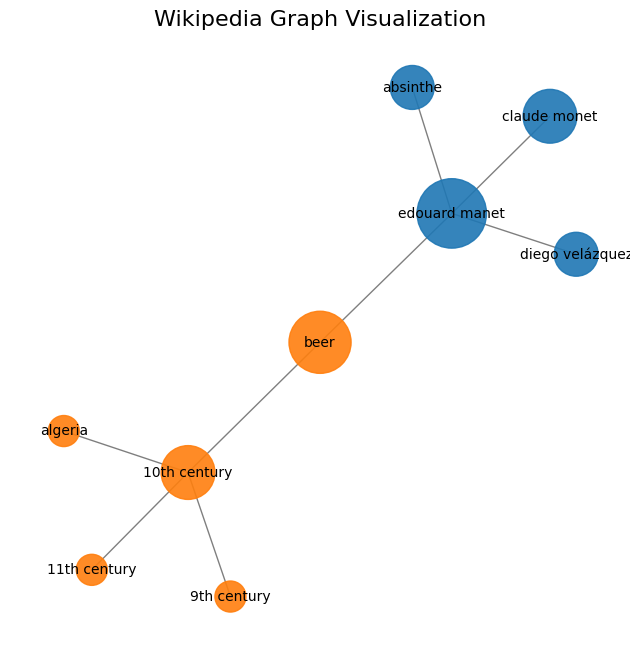

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Data for the graph
edges_right = [
    ("edouard manet", "claude monet"),
    ("edouard manet", "diego velázquez"),
    ("edouard manet", "absinthe"),
    ("beer", "edouard manet"),
    ("beer", "10th century"),
    ("10th century", "9th century"),
    ("10th century", "11th century"),
    ("10th century", "algeria"),
]
modularity_communities_right = {
    "edouard manet": 2,
    "claude monet": 2,
    "diego velázquez": 2,
    "absinthe": 2,
    "beer": 5,
    "10th century": 5,
    "9th century": 5,
    "11th century": 5,
    "algeria": 5,
}
pagerank_right = {
    "edouard manet": 0.5,
    "claude monet": 0.3,
    "diego velázquez": 0.2,
    "absinthe": 0.2,
    "beer": 0.4,
    "10th century": 0.3,
    "9th century": 0.1,
    "11th century": 0.1,
    "algeria": 0.1,
}

# Create the graph
G_right = nx.Graph()
G_right.add_edges_from(edges_right)

# Assign node colors and sizes
unique_communities = list(set(modularity_communities_right.values()))
color_map = mcolors.TABLEAU_COLORS  # Use a predefined color palette
colors = [color for color in color_map.values()]
community_color_map = {community: colors[i % len(colors)] for i, community in enumerate(unique_communities)}
node_colors_right = [community_color_map[modularity_communities_right[node]] for node in G_right.nodes()]
sizes_right = [pagerank_right[node] * 5000 for node in G_right.nodes()]

# Draw the graph
plt.figure(figsize=(8, 8))
pos_right = nx.spring_layout(G_right, seed=42)
nx.draw_networkx_nodes(
    G_right, pos_right, node_size=sizes_right, node_color=node_colors_right, alpha=0.9
)
nx.draw_networkx_edges(G_right, pos_right, alpha=0.5)
nx.draw_networkx_labels(G_right, pos_right, font_size=10)

plt.title("Wikipedia Graph Visualization", fontsize=16)
plt.axis("off")
plt.show()
